# $\kappa_\lambda$ truth $m_{hh}$ plot

**Goal:** Get a motivational $\kappa_\lambda$ money plot

In [28]:
import h5py
import pandas as pd
import numpy as np
import uproot
#from uproot_methods.classes.TLorentzVector import TLorentzVectorArray

import matplotlib.pyplot as plt
from matplotlib import gridspec

from glob import glob

import os
os.sys.path.append('RRevolution/code')
from utils import fileDirSLAC as fileDir, get_xsec
from processMNTs import getLambdaWeights

# os.sys.path.append('non-resonant-studies/')
# from kl_rw import getLambdaWeights

# os.sys.path.append('GraphNN')
# from processMC import getLambdaWeights

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
prodTag = 'JUN20'
mc = 'mc16a'

key = f'SMNR_{mc}-{prodTag}'

In [3]:
filename = glob(fileDir[key]+'*.root')[0]

In [4]:
f = uproot.open(filename)
t = f['XhhMiniNtuple']

In [5]:
for k in t.keys():
    print(k)

runNumber
eventNumber
lumiBlock
coreFlags
bcid
mcEventNumber
mcChannelNumber
mcEventWeight
NPV
actualInteractionsPerCrossing
averageInteractionsPerCrossing
weight_pileup
correctedAverageMu
correctedAndScaledAverageMu
correctedActualMu
correctedAndScaledActualMu
rand_run_nr
rand_lumiblock_nr
passedTriggerHashes
unmatchedTriggerHashes
nresolvedJets
resolvedJets_E
resolvedJets_pt
resolvedJets_phi
resolvedJets_eta
resolvedJets_NumTrkPt1000PV
resolvedJets_SumPtTrkPt1000PV
resolvedJets_TrackWidthPt1000PV
resolvedJets_NumTrkPt500PV
resolvedJets_SumPtTrkPt500PV
resolvedJets_TrackWidthPt500PV
resolvedJets_JVFPV
resolvedJets_JvtJvfcorr
resolvedJets_JvtRpt
resolvedJets_Jvt
resolvedJets_JvtPass_Loose
resolvedJets_JvtEff_SF_Loose
resolvedJets_JvtPass_Medium
resolvedJets_JvtEff_SF_Medium
resolvedJets_JvtPass_Tight
resolvedJets_JvtEff_SF_Tight
resolvedJets_fJvtPass_Medium
resolvedJets_fJvtEff_SF_Medium
resolvedJets_fJvtPass_Tight
resolvedJets_fJvtEff_SF_Tight
resolvedJets_MV2c00
resolvedJets_MV2c10
r

In [6]:
df = t.arrays(['truth_mHH','mcEventWeight'],library='pd')

In [7]:
df['mc_sf'] = df['mcEventWeight']

In [10]:
?getLambdaWeights

In [14]:
# Apply Michael H's truth rw
df['truth_mhh'] = df['truth_mHH'] / 1000

getLambdaWeights(df,
                 'data/weight-mHH-from-cHHHp01d0-to-cHHHpx_10GeV_Jul28.root',
                 w_sm='mcEventWeight')

In [15]:
text = "$\mathbf{ATLAS}$ Simulation Internal\n"
text += f"SM NR mc16a JUN20 MNT prod"
#text += "2016 triggers + 4 jets with $p_T$ > 40 GeV, $|\eta| < 2.5$"

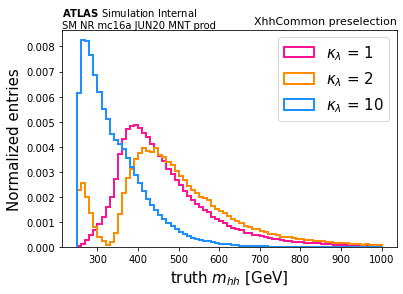

In [20]:
nb = 75
r = (250,1000)

kwargs = {'histtype':'step','lw':2,'density':True}

plt.hist(df.truth_mhh,nb,r,color='deeppink',label='$\kappa_\lambda$ = 1',
         weights=df.mcEventWeight,**kwargs)

for kl,c in zip([2,10],['darkorange','dodgerblue']):
    plt.hist(df.truth_mhh,nb,r,color=c,label=f'$\kappa_\lambda$ = {kl}',
             weights=df[f'w_k{kl}'],**kwargs)

plt.xlabel('truth $m_{hh}$ [GeV]',fontsize=15)
plt.ylabel('Normalized entries',fontsize=15)
plt.title('XhhCommon preselection',loc='right',fontsize=11)

plt.legend(fontsize=15)

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/SMNR_{mc}_PFlow-{prodTag}20/truth_mhh_kl_2_10_norm.pdf',
            bboxinches='tight')
plt.show()

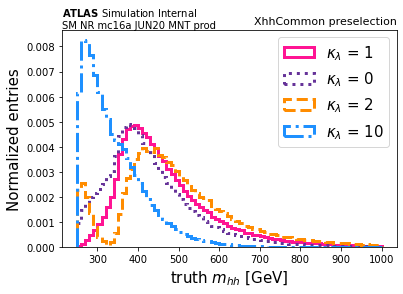

In [27]:
nb = 75
r = (250,1000)

kwargs = {'histtype':'step','lw':3,'density':True}

plt.hist(df.truth_mhh,nb,r,color='deeppink',label='$\kappa_\lambda$ = 1',
         weights=df.mcEventWeight,**kwargs)

for kl,c,ls in zip([0,2,10],['rebeccapurple','darkorange','dodgerblue'],['dotted','--','-.']):
    plt.hist(df.truth_mhh,nb,r,color=c,ls=ls,label=f'$\kappa_\lambda$ = {kl}',
             weights=df[f'w_k{kl}'],**kwargs)

plt.xlabel('truth $m_{hh}$ [GeV]',fontsize=15)
plt.ylabel('Normalized entries',fontsize=15)
plt.title('XhhCommon preselection',loc='right',fontsize=11)

plt.legend(fontsize=15)

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/SMNR_{mc}_PFlow-{prodTag}20/truth_mhh_kl_0_2_10_norm.pdf',
            bboxinches='tight')
plt.show()

In [29]:
get_xsec(0) / get_xsec(1)

2.267942182898459

Include negative values too

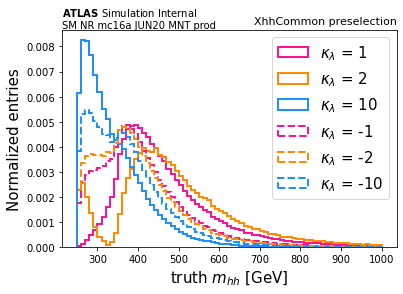

In [67]:
kwargs = {'histtype':'step','lw':2,'density':True}

plt.hist(df.truth_mhh,nb,r,color='deeppink',label='$\kappa_\lambda$ = 1',
         weights=df.mcEventWeight,**kwargs)

for kl,c in zip([2,10],['darkorange','dodgerblue']):
    plt.hist(df.truth_mhh,nb,r,color=c,label=f'$\kappa_\lambda$ = {kl}',
             weights=df[f'w_k{kl}'],**kwargs)
    
kwargs['ls'] = '--'
for kl,c in zip([-1,-2,-10],['deeppink','darkorange','dodgerblue']):
    plt.hist(df.truth_mhh,nb,r,color=c,label=f'$\kappa_\lambda$ = {kl}',
             weights=df[f'w_k{kl}'],**kwargs)

plt.xlabel('truth $m_{hh}$ [GeV]',fontsize=15)
plt.ylabel('Normalized entries',fontsize=15)
plt.title('XhhCommon preselection',loc='right',fontsize=11)

plt.legend(fontsize=15)

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/SMNR_{mc}_PFlow-{prodTag}/truth_mhh_kl_2_10_neg_norm.pdf',
            bboxinches='tight')
plt.show()

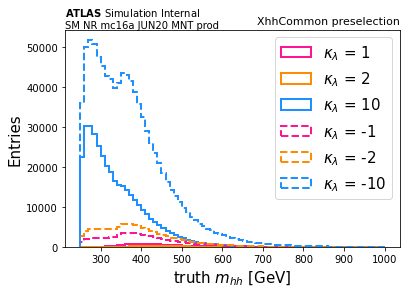

In [72]:
kwargs = {'histtype':'step','lw':2,'density': False}

plt.hist(df.truth_mhh,nb,r,color='deeppink',label='$\kappa_\lambda$ = 1',
         weights=df.mcEventWeight,**kwargs)

for kl,c in zip([2,10],['darkorange','dodgerblue']):
    plt.hist(df.truth_mhh,nb,r,color=c,label=f'$\kappa_\lambda$ = {kl}',
             weights=df[f'w_k{kl}'],**kwargs)
    
kwargs['ls'] = '--'
for kl,c in zip([-1,-2,-10],['deeppink','darkorange','dodgerblue']):
    plt.hist(df.truth_mhh,nb,r,color=c,label=f'$\kappa_\lambda$ = {kl}',
             weights=df[f'w_k{kl}'],**kwargs)

plt.xlabel('truth $m_{hh}$ [GeV]',fontsize=15)
plt.ylabel('Entries',fontsize=15)
plt.title('XhhCommon preselection',loc='right',fontsize=11)

plt.legend(fontsize=15)

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/SMNR_{mc}_PFlow-{prodTag}/truth_mhh_kl_2_10_neg.pdf',
            bboxinches='tight')
plt.show()

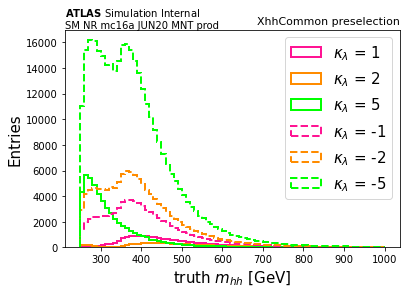

In [71]:
kwargs = {'histtype':'step','lw':2,'density': False}

plt.hist(df.truth_mhh,nb,r,color='deeppink',label='$\kappa_\lambda$ = 1',
         weights=df.mcEventWeight,**kwargs)

for kl,c in zip([2,5],['darkorange','lime']):
    plt.hist(df.truth_mhh,nb,r,color=c,label=f'$\kappa_\lambda$ = {kl}',
             weights=df[f'w_k{kl}'],**kwargs)
    
kwargs['ls'] = '--'
for kl,c in zip([-1,-2,-5],['deeppink','darkorange','lime']):
    plt.hist(df.truth_mhh,nb,r,color=c,label=f'$\kappa_\lambda$ = {kl}',
             weights=df[f'w_k{kl}'],**kwargs)

plt.xlabel('truth $m_{hh}$ [GeV]',fontsize=15)
plt.ylabel('Entries',fontsize=15)
plt.title('XhhCommon preselection',loc='right',fontsize=11)

plt.legend(fontsize=15)

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/SMNR_{mc}_PFlow-{prodTag}/truth_mhh_kl_2_5_neg.pdf',
            bboxinches='tight')
plt.show()

**If there's time - it would also be nice to get some plot showing that the $b$-jets are resolved**

In [86]:
# Load in truth barcode information

pdg            = np.vstack(t.array('truth_pdgId'))
barcode        = np.vstack(t.array('truth_barcode'))

higgs_barcodes = barcode[pdg == 25].reshape(-1,2)

pbarc = t.array('truth_parent_barcode')
b_parent_barcodes = np.vstack([[x[0] for pdg,x in zip(pdgs,ps) if np.abs(pdg) == 5] \
                                for pdgs,ps in zip(pdg,pbarc) ])

In [80]:
pt  = np.vstack(t.array('truth_pt'))
eta = np.vstack(t.array('truth_eta'))
phi = np.vstack(t.array('truth_phi'))
E   = np.vstack(t.array('truth_E'))

In [84]:
b_pt =  pt[np.abs(pdg) == 5].reshape(-1,4)
b_eta = eta[np.abs(pdg) == 5].reshape(-1,4)
b_phi = phi[np.abs(pdg) == 5].reshape(-1,4)
b_E   = E[np.abs(pdg) == 5].reshape(-1,4)

In [107]:
c_list = []

for pi, (i11, i12, i21, i22) in enumerate([(0,1,2,3), (0,2,1,3), (0,3,1,2)]):
    
    print(f'HC1 : {i11} {i12}, HC2: {i21} {i22}')
    
    j11 = TLorentzVectorArray.from_ptetaphi(b_pt[:,i11], b_eta[:,i11], b_phi[:,i11], b_E[:,i11])
    j12 = TLorentzVectorArray.from_ptetaphi(b_pt[:,i12], b_eta[:,i12], b_phi[:,i12], b_E[:,i12])
    j21 = TLorentzVectorArray.from_ptetaphi(b_pt[:,i21], b_eta[:,i21], b_phi[:,i21], b_E[:,i21])
    j22 = TLorentzVectorArray.from_ptetaphi(b_pt[:,i22], b_eta[:,i22], b_phi[:,i22], b_E[:,i22])

    mask = (j11+j12).pt > (j21+j22).pt
    
    # Fill the leading HC entries
    df[f'pair{pi}_b11_pt']  = np.where(mask, j11.pt,  j21.pt)
    df[f'pair{pi}_b11_eta'] = np.where(mask, j11.eta, j21.eta)
    df[f'pair{pi}_b11_phi'] = np.where(mask, j11.phi, j21.phi)
    df[f'pair{pi}_b11_E']   = np.where(mask, j11.E,   j21.E)
    
    df[f'pair{pi}_b12_pt']  = np.where(mask, j12.pt,  j22.pt)
    df[f'pair{pi}_b12_eta'] = np.where(mask, j12.eta, j22.eta)
    df[f'pair{pi}_b12_phi'] = np.where(mask, j12.phi, j22.phi)
    df[f'pair{pi}_b12_E']   = np.where(mask, j12.E,   j22.E)
    
    # Fill the subleading HC entries
    df[f'pair{pi}_b21_pt']  = np.where(~mask, j11.pt,  j21.pt)
    df[f'pair{pi}_b21_eta'] = np.where(~mask, j11.eta, j21.eta)
    df[f'pair{pi}_b21_phi'] = np.where(~mask, j11.phi, j21.phi)
    df[f'pair{pi}_b21_E']   = np.where(~mask, j11.E,   j21.E)
    
    df[f'pair{pi}_b22_pt']  = np.where(~mask, j12.pt,  j22.pt)
    df[f'pair{pi}_b22_eta'] = np.where(~mask, j12.eta, j22.eta)
    df[f'pair{pi}_b22_phi'] = np.where(~mask, j12.phi, j22.phi)
    df[f'pair{pi}_b22_E']   = np.where(~mask, j12.E,   j22.E)
    
    # Save whether this is the correct pair or not
    m2 = (b_parent_barcodes == higgs_barcodes[:,0].reshape(-1,1))
    correctPair = (m2[:,i11] & m2[:,i12]) | (m2[:,i21] & m2[:,i22])
    df.loc[correctPair,'correctPair'] = pi
    
    c_list.append(np.sum(correctPair))


HC1 : 0 1, HC2: 2 3
HC1 : 0 2, HC2: 1 3
HC1 : 0 3, HC2: 1 2


In [102]:
sum(c_list)

686712

In [103]:
len(df)

686712

In [99]:
correctPair

array([ True, False,  True, ..., False, False,  True])

In [95]:
from itertools import product

In [108]:
# Use this correct pair to retrieve the higgs kinematics

for pi in range(3):
    for hi, ji, v in product([1,2],[1,2],['pt','eta','phi','E']):
        k = f'b{hi}{ji}_{v}'

        m = (df.correctPair==pi)
        df.loc[m,k] = df.loc[m,f'pair{pi}_{k}']
        

In [110]:
df['deta_h1'] = df.b11_eta - df.b12_eta
df['deta_h2'] = df.b21_eta - df.b22_eta

df['dPhi_h1'] = np.arccos( np.cos(df.b11_phi - df.b12_phi))
df['dPhi_h2'] = np.arccos( np.cos(df.b21_phi - df.b22_phi))

In [112]:
df['dRjj_h1'] = np.sqrt(df.deta_h1**2 + df.dPhi_h1**2)
df['dRjj_h2'] = np.sqrt(df.deta_h2**2 + df.dPhi_h2**2)

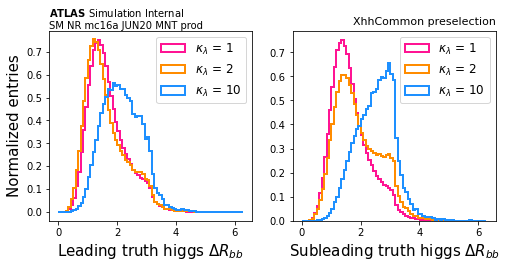

In [121]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3.5))

nb = 75
r = (0,2*np.pi)

kwargs = {'histtype':'step','lw':2,'density':True}

ax1.hist(df.dRjj_h1,nb,r,color='deeppink',label='$\kappa_\lambda$ = 1',
         weights=df.mcEventWeight,**kwargs)
ax2.hist(df.dRjj_h1,nb,r,color='deeppink',label='$\kappa_\lambda$ = 1',
         weights=df.mcEventWeight,**kwargs)

for kl,c in zip([2,10],['darkorange','dodgerblue']):
    ax1.hist(df.dRjj_h1,nb,r,color=c,label=f'$\kappa_\lambda$ = {kl}',
             weights=df[f'w_k{kl}'],**kwargs)
    ax2.hist(df.dRjj_h2,nb,r,color=c,label=f'$\kappa_\lambda$ = {kl}',
             weights=df[f'w_k{kl}'],**kwargs)

ax1.set_xlabel('Leading truth higgs $\Delta R_{bb}$',fontsize=15)
ax2.set_xlabel('Subleading truth higgs $\Delta R_{bb}$',fontsize=15)
ax1.set_ylabel('Normalized entries',fontsize=15)
ax2.set_title('XhhCommon preselection',loc='right',fontsize=11)

ax1.legend(fontsize=12)
ax2.legend(fontsize=12)

#ax = plt.gca()
ax1.text(0,1,text,ha='left',va='bottom',transform=ax1.transAxes)

plt.savefig(f'figures/SMNR_{mc}_PFlow-{prodTag}/dRbb_kl_2_10_norm.pdf',
            bboxinches='tight')
plt.show()

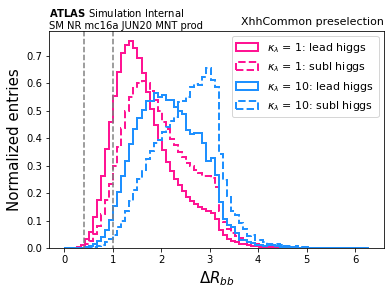

In [137]:
nb = 75
r = (0,2*np.pi)

kwargs = {'histtype':'step','lw':2,'density':True}

plt.hist(df.dRjj_h1,nb,r,color='deeppink',label='$\kappa_\lambda$ = 1: lead higgs',
         weights=df.mcEventWeight,**kwargs)
plt.hist(df.dRjj_h2,nb,r,color='deeppink',label='$\kappa_\lambda$ = 1: subl higgs',
         weights=df.mcEventWeight,ls='--',**kwargs)

#for kl,c in zip([2,10],['darkorange','dodgerblue']):
    
kl, c = 10, 'dodgerblue'
plt.hist(df.dRjj_h1,nb,r,color=c,label=f'$\kappa_\lambda$ = {kl}: lead higgs',
         weights=df[f'w_k{kl}'],**kwargs)
plt.hist(df.dRjj_h2,nb,r,color=c,label=f'$\kappa_\lambda$ = {kl}: subl higgs',
         weights=df[f'w_k{kl}'],ls='--',**kwargs)

plt.xlabel('$\Delta R_{bb}$',fontsize=15)
plt.ylabel('Normalized entries',fontsize=15)
plt.title('XhhCommon preselection',loc='right',fontsize=11)

plt.legend(fontsize=11)

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

# Add a line for 0.4?
ylim = plt.ylim()
plt.plot([0.4]*2,ylim,'grey',ls='--')
plt.ylim(ylim)

ylim = plt.ylim()
plt.plot([1]*2,ylim,'grey',ls='--')
plt.ylim(0,ylim[1])

plt.savefig(f'figures/SMNR_{mc}_PFlow-{prodTag}/dRbb_kl_10_norm.pdf',
            bboxinches='tight')
plt.show()